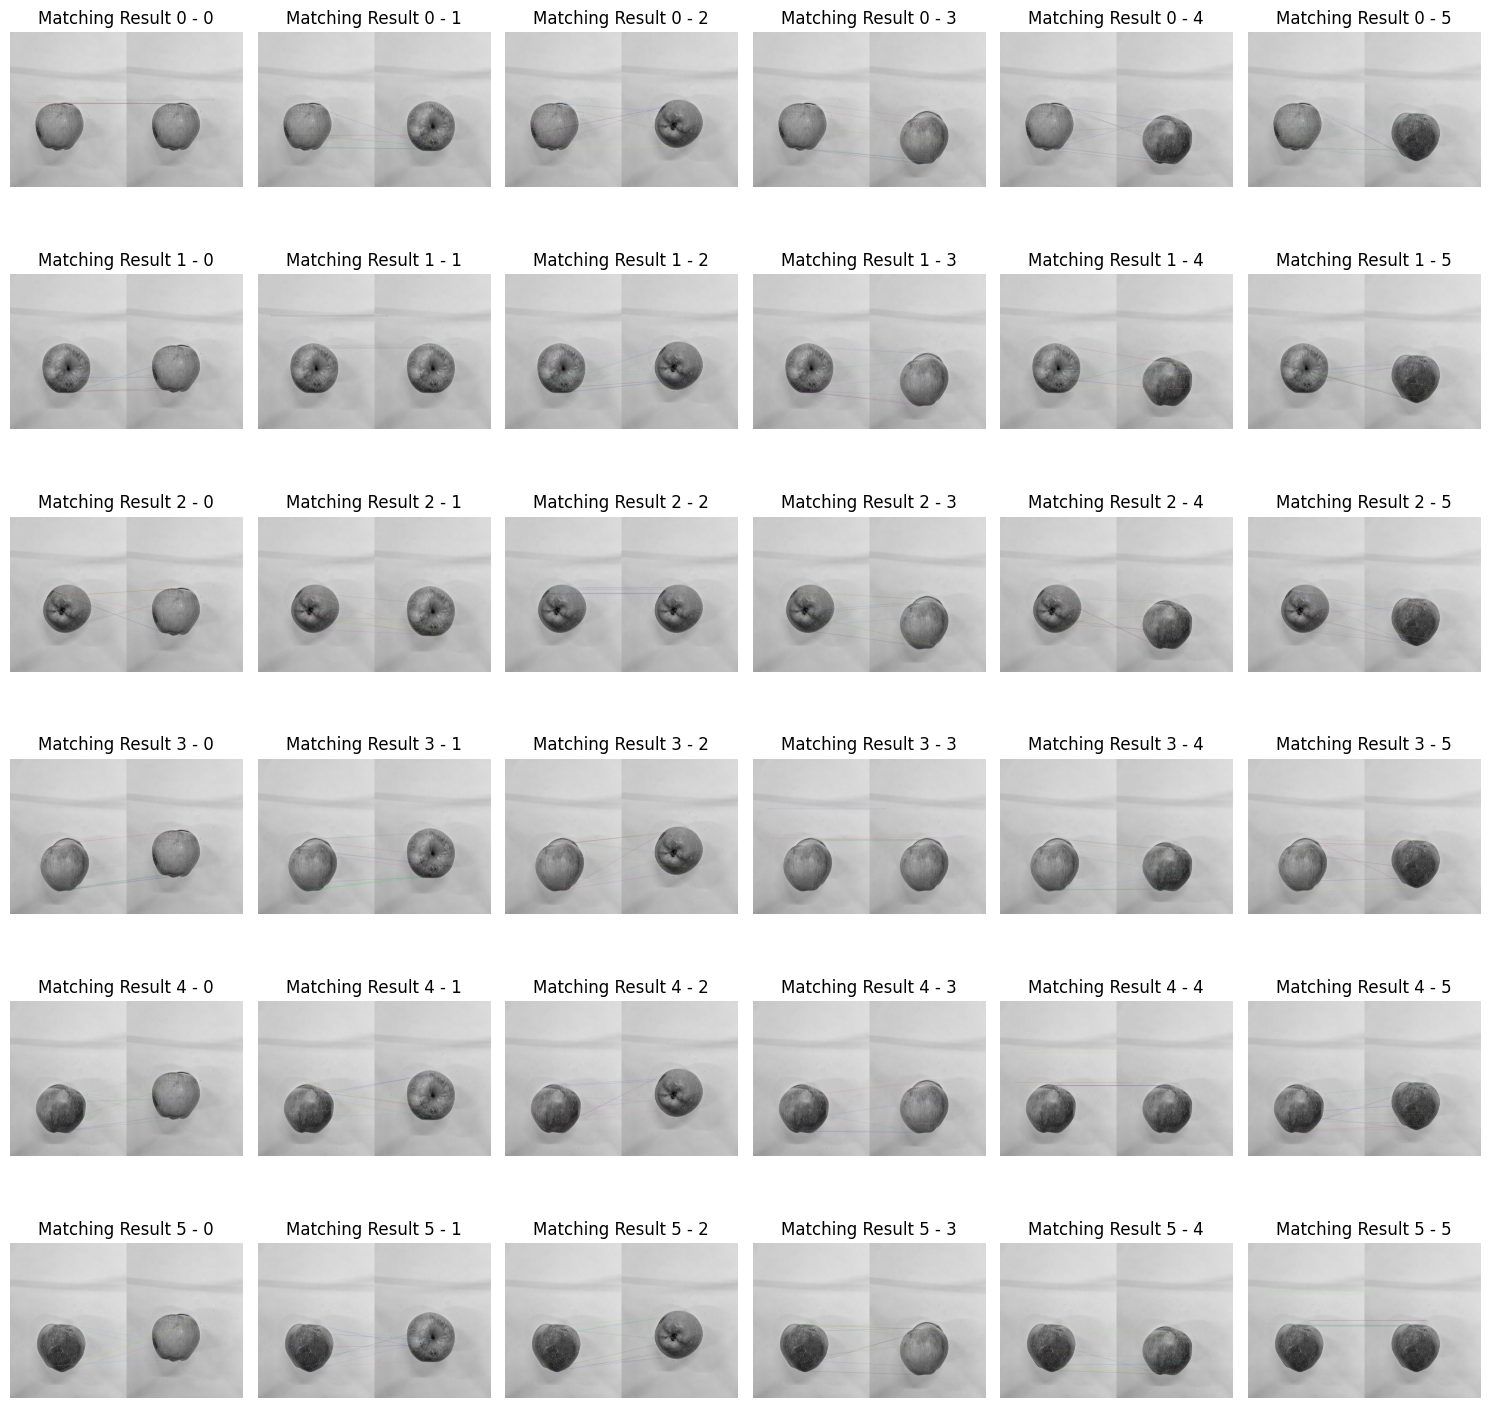

In [3]:
import cv2
import matplotlib.pyplot as plt

# List of image paths
image_paths = ['../Dataset_Cropped/3a.jpg', '../Dataset_Cropped/3b.jpg', '../Dataset_Cropped/3c.jpg',
               '../Dataset_Cropped/3d.jpg', '../Dataset_Cropped/3e.jpg', '../Dataset_Cropped/3f.jpg',
               '../Dataset_Cropped/3g.jpg', '../Dataset_Cropped/3h.jpg', '../Dataset_Cropped/3i.jpg']

# Initialize A-KAZE detector and descriptor
akaze = cv2.AKAZE_create()

# Initialize brute-force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

num_of_images = len(image_paths) - 3

# Plotting parameters
rows = num_of_images
cols = num_of_images

fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Loop through each pair of images
for i in range(num_of_images):
    for j in range(num_of_images):
        # if i < j:  # Exclude comparison with itself
            # print(i, j)
            # Load the input images
        image1 = cv2.imread(image_paths[i], cv2.IMREAD_GRAYSCALE)
        image2 = cv2.imread(image_paths[j], cv2.IMREAD_GRAYSCALE)

        # Detect and compute keypoints and descriptors
        keypoints1, descriptors1 = akaze.detectAndCompute(image1, None)
        keypoints2, descriptors2 = akaze.detectAndCompute(image2, None)

        # Match descriptors
        matches = bf.match(descriptors1, descriptors2)

        # Sort matches by distance
        matches = sorted(matches, key=lambda x: x.distance)

        # Draw top matches
        matching_result = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

        # Convert BGR image to RGB for Matplotlib
        matching_result_rgb = cv2.cvtColor(matching_result, cv2.COLOR_BGR2RGB)

        # Plot the matching result using Matplotlib
        axes[i, j].imshow(matching_result_rgb)
        axes[i, j].axis('off')
        axes[i, j].set_title(f'Matching Result {i} - {j}')

# Adjust layout
plt.tight_layout()
plt.show()